In [1]:
import pandas as pd

dim_employee = pd.read_csv(r'D:\Machine_Learning\Input\archive (8)\DimEmployee.csv')
fact_sales = pd.read_csv(r'D:\Machine_Learning\Input\archive (8)\FactSales.csv')
dim_store = pd.read_csv(r'D:\Machine_Learning\Input\archive (8)\DimStore.csv')
dim_geography = pd.read_csv(r'D:\Machine_Learning\Input\archive (8)\DimGeography.csv')
#sales_data = pd.read_csv(r'D:\Machine_Learning\Input\archive (8)\FactSales.csv')
exchange_rate_data = pd.read_csv(r'D:\Machine_Learning\Input\archive (8)\FactExchangeRate.csv')
currency_data = pd.read_csv(r'D:\Machine_Learning\Input\archive (8)\DimCurrency.csv')


store_sales = fact_sales.groupby('StoreKey')['SalesAmount'].sum().reset_index()

store_sales_details = pd.merge(store_sales, dim_store[['StoreKey', 'StoreManager', 'GeographyKey']], on='StoreKey')

employee_sales_details = pd.merge(store_sales_details, dim_employee, left_on='StoreManager', right_on='EmployeeKey')

us_managers_sales = pd.merge(employee_sales_details, dim_geography[['GeographyKey', 'RegionCountryName']], on='GeographyKey')
us_managers_sales = us_managers_sales[us_managers_sales['RegionCountryName'] == 'United States']


top_performers = us_managers_sales[us_managers_sales['SalesAmount'] >= us_managers_sales['SalesAmount'].quantile(0.90)]


strategy_training = us_managers_sales[us_managers_sales['SalesAmount'] < us_managers_sales['SalesAmount'].quantile(0.90)]


print("Top Performers for Managerial Training:")
print(top_performers[['FirstName', 'LastName', 'SalesAmount']])

print("\nManagers for Sales Strategy Training:")
print(strategy_training[['FirstName', 'LastName', 'SalesAmount']])


Top Performers for Managerial Training:
     FirstName     LastName   SalesAmount
2          Roy       Antebi  6.281687e+08
28      Manuel     Oliveira  2.327772e+07
32       Yossi          Ran  2.339704e+07
38         Ann        Beebe  2.325419e+07
55      Morten    Rasmussen  2.343429e+07
57     Michael      Berroth  2.348587e+07
59     Michael      Neipper  2.371438e+07
70   Raffaella      Bonaldi  2.327321e+07
99    Terrence       Philip  2.334981e+07
107      Maria      Cameron  2.355546e+07
117      Chris      Preston  2.324475e+07
131       Greg      Chapman  2.324900e+07
151      Pablo  Rovira Diez  2.342906e+07
155    Michael     Ruggiero  2.323985e+07
160       Ioan    Crisiarcu  2.323091e+07
189      David      Simpson  2.337259e+07
190       Cari         Dick  2.322058e+07
193     Bonnie       Skelly  2.377655e+07
197        Ben        Smith  9.842494e+08
198        Jan        Dryml  1.078008e+09

Managers for Sales Strategy Training:
    FirstName        LastName   SalesAm

In [2]:
top_performers.columns

Index(['StoreKey', 'SalesAmount', 'StoreManager', 'GeographyKey',
       'EmployeeKey', 'ParentEmployeeKey', 'FirstName', 'LastName', 'Title',
       'HireDate', 'BirthDate', 'EmailAddress', 'Phone',
       'EmergencyContactName', 'EmergencyContactPhone', 'Gender',
       'PayFrequency', 'BaseRate', 'VacationHours', 'DepartmentName',
       'StartDate', 'Status', 'SalaryStatus', 'IsSalesPerson', 'IsMarried',
       'RegionCountryName'],
      dtype='object')

In [3]:
strategy_training.columns

Index(['StoreKey', 'SalesAmount', 'StoreManager', 'GeographyKey',
       'EmployeeKey', 'ParentEmployeeKey', 'FirstName', 'LastName', 'Title',
       'HireDate', 'BirthDate', 'EmailAddress', 'Phone',
       'EmergencyContactName', 'EmergencyContactPhone', 'Gender',
       'PayFrequency', 'BaseRate', 'VacationHours', 'DepartmentName',
       'StartDate', 'Status', 'SalaryStatus', 'IsSalesPerson', 'IsMarried',
       'RegionCountryName'],
      dtype='object')

In [4]:
#top_performers.to_csv(r'D:\Machine_Learning\output\top_perfomers.csv',index=False)

In [5]:
sales_by_date = fact_sales.groupby('DateKey')['SalesAmount'].sum().reset_index()


In [6]:
sales_by_date

,DateKey,SalesAmount
0,2007-01-01,8.310498e+06
1,2007-01-02,8.326143e+06
2,2007-01-03,8.409919e+06
3,2007-01-04,8.231880e+06
4,2007-01-05,8.089676e+06
...,...,...
1091,2009-12-27,1.058082e+07
1092,2009-12-28,1.025124e+07
1093,2009-12-29,1.066394e+07
1094,2009-12-30,1.050448e+07


In [7]:
sales_by_date['DateKey'] = pd.to_datetime(sales_by_date['DateKey'], format='%Y-%m-%d')


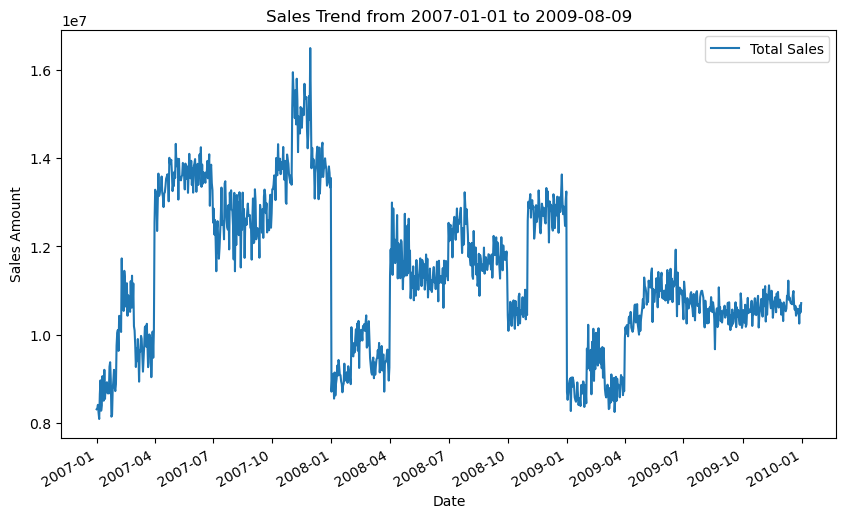

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.figure(figsize=(10, 6))
plt.plot(sales_by_date['DateKey'], sales_by_date['SalesAmount'], label='Total Sales')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate the date labels for readability
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Sales Trend from 2007-01-01 to 2009-08-09')
plt.legend()
plt.show()



Outage 1 (January 2009):
Pre-outage sales (before 2009-01-01 00:00:00):
       DateKey   SalesAmount
0   2007-01-01  8.310498e+06
1   2007-01-02  8.326143e+06
2   2007-01-03  8.409919e+06
3   2007-01-04  8.231880e+06
4   2007-01-05  8.089676e+06
..         ...           ...
726 2008-12-27  1.290236e+07
727 2008-12-28  1.275630e+07
728 2008-12-29  1.246458e+07
729 2008-12-30  1.303621e+07
730 2008-12-31  1.324272e+07

[731 rows x 2 columns]

During outage sales (from 2009-01-01 00:00:00 to 2009-03-31 00:00:00):
       DateKey   SalesAmount
731 2009-01-01  8.703183e+06
732 2009-01-02  8.523830e+06
733 2009-01-03  8.663963e+06
734 2009-01-04  8.878584e+06
735 2009-01-05  8.961308e+06
..         ...           ...
816 2009-03-27  8.902910e+06
817 2009-03-28  9.036206e+06
818 2009-03-29  8.629532e+06
819 2009-03-30  8.767345e+06
820 2009-03-31  8.721262e+06

[90 rows x 2 columns]

Post-outage sales (after 2009-03-31 00:00:00):
        DateKey   SalesAmount
821  2009-04-01  9.921094e+06
822  

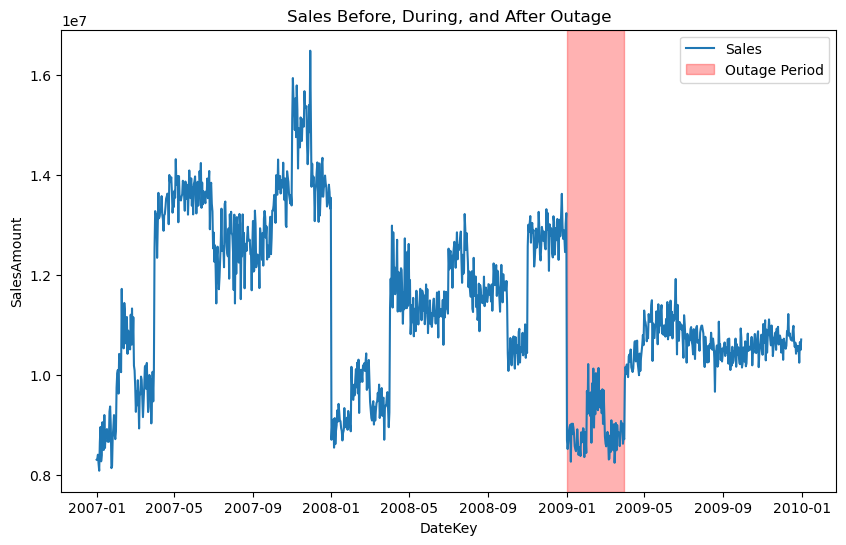

In [9]:
import pandas as pd

outage_start_1 = pd.to_datetime('2009-01-01')
outage_end_1 = pd.to_datetime('2009-03-31')

pre_outage_sales_1 = sales_by_date[sales_by_date['DateKey'] < outage_start_1]
during_outage_sales_1 = sales_by_date[(sales_by_date['DateKey'] >= outage_start_1) & (sales_by_date['DateKey'] <= outage_end_1)]

post_outage_sales_1 = sales_by_date[sales_by_date['DateKey'] > outage_end_1]

print("Outage 1 (January 2009):")
print(f"Pre-outage sales (before {outage_start_1}):")
print(pre_outage_sales_1[['DateKey', 'SalesAmount']])

print(f"\nDuring outage sales (from {outage_start_1} to {outage_end_1}):")
print(during_outage_sales_1[['DateKey', 'SalesAmount']])

print(f"\nPost-outage sales (after {outage_end_1}):")
print(post_outage_sales_1[['DateKey', 'SalesAmount']])


plt.figure(figsize=(10, 6))
plt.plot(sales_by_date['DateKey'], sales_by_date['SalesAmount'], label='Sales')
plt.axvspan('2009-01-01', '2009-03-31', color='red', alpha=0.3, label='Outage Period')
plt.xlabel('DateKey')
plt.ylabel('SalesAmount')
plt.title('Sales Before, During, and After Outage')
plt.legend()
plt.show()


In [10]:
pre_outage_sales_1.to_csv(r'D:\Machine_Learning\output\pre_outage_sale.csv',index=False)
during_outage_sales_1.to_csv(r'D:\Machine_Learning\output\during_outage_sales.csv',index=False)
post_outage_sales_1.to_csv(r'D:\Machine_Learning\output\post_outage_sales.csv',index=False)

In [11]:

fact_exchange_rate = pd.read_csv(r'D:\Machine_Learning\Input\archive (8)\FactExchangeRate.csv')
dim_currency = pd.read_csv(r'D:\Machine_Learning\Input\archive (8)\DimCurrency.csv')

currency_exchange = pd.merge(fact_exchange_rate, dim_currency, on='CurrencyKey')

currency_exchange['RateDifference'] = currency_exchange['EndOfDayRate'] - currency_exchange['AverageRate']

top_depreciating_currencies = currency_exchange.groupby('CurrencyName')['RateDifference'].sum().nsmallest(3)

print("Top 3 Depreciating Currencies:")
print(top_depreciating_currencies)

usd_sales = fact_sales[fact_sales['CurrencyKey'] == 1]  
print(f"Total Sales in USD: {usd_sales['SalesAmount'].sum()}")


Top 3 Depreciating Currencies:
CurrencyName
AMD   -77.60000
AUD    -0.21153
CHF    -0.16220
Name: RateDifference, dtype: float64
Total Sales in USD: 12413657608.887602


In [12]:
usd_sales = fact_sales[fact_sales['CurrencyKey'] == 1]  

In [13]:
usd_sales

,SalesKey,DateKey,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount
0,1,2007-01-02,1,209,956,10,1,91.05,198.00,8,0,0.00,1,39.600,728.40,1544.400
1,2,2007-02-12,4,308,766,2,1,10.15,19.90,4,0,0.00,1,0.995,40.60,78.605
2,3,2008-01-24,1,156,1175,11,1,209.03,410.00,9,0,0.00,3,61.500,1881.27,3628.500
3,4,2008-01-13,2,306,1429,10,1,132.90,289.00,8,0,0.00,1,57.800,1063.20,2254.200
4,5,2008-01-22,2,306,1133,10,1,144.52,436.20,24,0,0.00,3,261.720,3468.48,10207.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406084,3406085,2007-10-09,1,121,920,1,1,0.48,0.95,5,0,0.00,0,0.000,2.40,4.750
3406085,3406086,2007-07-08,1,89,1202,3,1,330.66,998.00,12,0,0.00,0,0.000,3967.92,11976.000
3406086,3406087,2009-03-06,2,307,1361,24,1,16.56,49.99,18,1,49.99,5,49.990,281.52,849.830
3406087,3406088,2007-02-04,1,55,539,2,1,760.38,2295.00,9,0,0.00,3,344.250,6843.42,20310.750


In [13]:
top_depreciating_currencies.to_csv(r'D:\Machine_Learning\output\top_depreciating_currencies.csv',index=False)

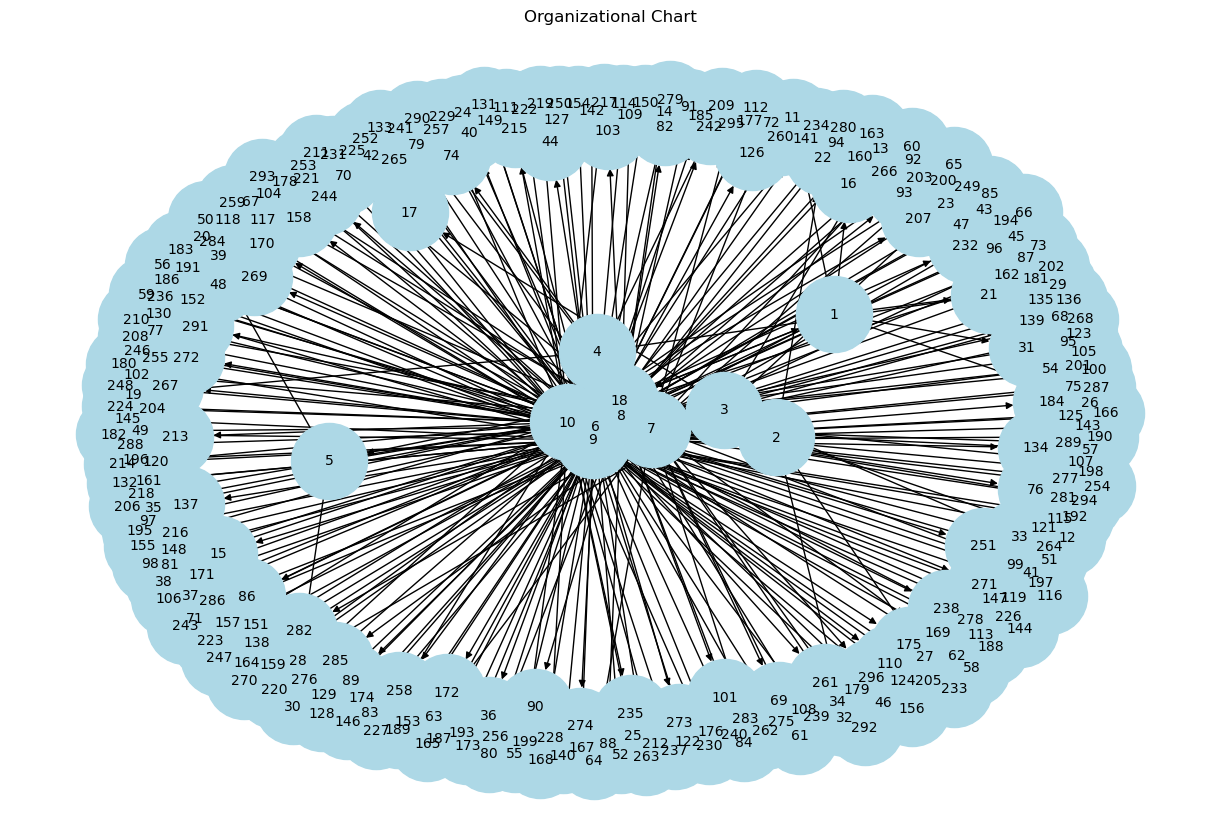

In [16]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.DiGraph()
for _, row in dim_employee.iterrows():
    if not pd.isna(row['ParentEmployeeKey']):
        G.add_edge(row['ParentEmployeeKey'], row['EmployeeKey'])

# Draw the org chart
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_color="black")
plt.title('Organizational Chart')
plt.show()


In [10]:
import pandas as pd

sales_data = pd.read_csv(r'D:\Machine_Learning\Input\archive (8)\FactSales.csv')
exchange_rate_data = pd.read_csv(r'D:\Machine_Learning\Input\archive (8)\FactExchangeRate.csv')

sales_data['DateKey'] = pd.to_datetime(sales_data['DateKey']).dt.strftime('%Y%m%d').astype(int)
exchange_rate_data['DateKey'] = pd.to_datetime(exchange_rate_data['DateKey']).dt.strftime('%Y%m%d').astype(int)

sales_data['CurrencyKey'] = sales_data['CurrencyKey'].astype(int)
exchange_rate_data['CurrencyKey'] = exchange_rate_data['CurrencyKey'].astype(int)

merged_data = pd.merge(sales_data, exchange_rate_data, on=['CurrencyKey', 'DateKey'], how='inner')

merged_data['SalesInUSD'] = merged_data['SalesAmount'] / merged_data['AverageRate']


sales_analysis = merged_data.groupby(['CurrencyKey', 'DateKey']).agg(
    LocalCurrencySales=('SalesAmount', 'sum'),
    USDSales=('SalesInUSD', 'sum')
).reset_index()

print(sales_analysis.head())

sales_analysis['USDChange'] = sales_analysis.groupby('CurrencyKey')['USDSales'].pct_change()
sales_analysis['LocalChange'] = sales_analysis.groupby('CurrencyKey')['LocalCurrencySales'].pct_change()



   CurrencyKey   DateKey  LocalCurrencySales      USDSales
0            1  20070101        8.310498e+06  8.310498e+06
1            1  20070201        9.750886e+06  9.750886e+06
2            1  20070301        1.009683e+07  1.009683e+07
3            1  20070401        1.254465e+07  1.254465e+07
4            1  20070501        1.336765e+07  1.336765e+07
    CurrencyKey   DateKey  LocalCurrencySales      USDSales  USDChange
12            1  20080101        8.709221e+06  8.709221e+06  -0.367549
21            1  20081001        1.043463e+07  1.043463e+07  -0.117391
24            1  20090101        8.703183e+06  8.703183e+06  -0.325952


In [14]:

significant_drops = sales_analysis[sales_analysis['USDChange'] < -0.1]  # Drop greater than 20%

print(significant_drops[['CurrencyKey', 'DateKey', 'LocalCurrencySales', 'USDSales', 'USDChange']])

    CurrencyKey   DateKey  LocalCurrencySales      USDSales  USDChange
12            1  20080101        8.709221e+06  8.709221e+06  -0.367549
21            1  20081001        1.043463e+07  1.043463e+07  -0.117391
24            1  20090101        8.703183e+06  8.703183e+06  -0.325952


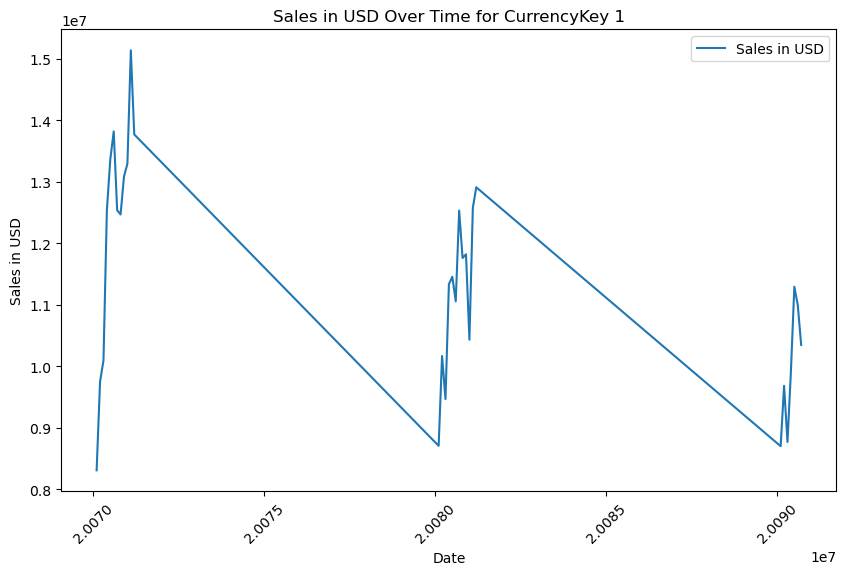

In [16]:
sales_data['DateKey'] = pd.to_datetime(sales_data['DateKey']).dt.strftime('%Y%m%d').astype(int)
exchange_rate_data['DateKey'] = pd.to_datetime(exchange_rate_data['DateKey']).dt.strftime('%Y%m%d').astype(int)

sales_data['CurrencyKey'] = sales_data['CurrencyKey'].astype(int)
exchange_rate_data['CurrencyKey'] = exchange_rate_data['CurrencyKey'].astype(int)

merged_data = pd.merge(sales_data, exchange_rate_data, on=['CurrencyKey', 'DateKey'], how='inner')

merged_data = pd.merge(merged_data, currency_data, on='CurrencyKey', how='left')

merged_data['SalesInUSD'] = merged_data['SalesAmount'] / merged_data['AverageRate']

sales_analysis = merged_data.groupby(['CurrencyKey', 'DateKey', 'CurrencyName']).agg(
    LocalCurrencySales=('SalesAmount', 'sum'),
    USDSales=('SalesInUSD', 'sum')
).reset_index()

print(sales_analysis.head())

sales_analysis['USDChange'] = sales_analysis.groupby('CurrencyKey')['USDSales'].pct_change()
sales_analysis['LocalChange'] = sales_analysis.groupby('CurrencyKey')['LocalCurrencySales'].pct_change()

significant_drops = sales_analysis[sales_analysis['USDChange'] < -0.1]  # Drop greater than 10%

print(significant_drops[['CurrencyKey', 'DateKey', 'CurrencyName', 'LocalCurrencySales', 'USDSales', 'USDChange']])


   CurrencyKey   DateKey CurrencyName  LocalCurrencySales      USDSales
0            1  20070101          USD        8.310498e+06  8.310498e+06
1            1  20070201          USD        9.750886e+06  9.750886e+06
2            1  20070301          USD        1.009683e+07  1.009683e+07
3            1  20070401          USD        1.254465e+07  1.254465e+07
4            1  20070501          USD        1.336765e+07  1.336765e+07
    CurrencyKey   DateKey CurrencyName  LocalCurrencySales      USDSales  \
12            1  20080101          USD        8.709221e+06  8.709221e+06   
21            1  20081001          USD        1.043463e+07  1.043463e+07   
24            1  20090101          USD        8.703183e+06  8.703183e+06   

    USDChange  
12  -0.367549  
21  -0.117391  
24  -0.325952  


In [17]:
significant_drops

,CurrencyKey,DateKey,CurrencyName,LocalCurrencySales,USDSales,USDChange,LocalChange
12,1,20080101,USD,8.709221e+06,8.709221e+06,-0.367549,-0.367549
21,1,20081001,USD,1.043463e+07,1.043463e+07,-0.117391,-0.117391
24,1,20090101,USD,8.703183e+06,8.703183e+06,-0.325952,-0.325952


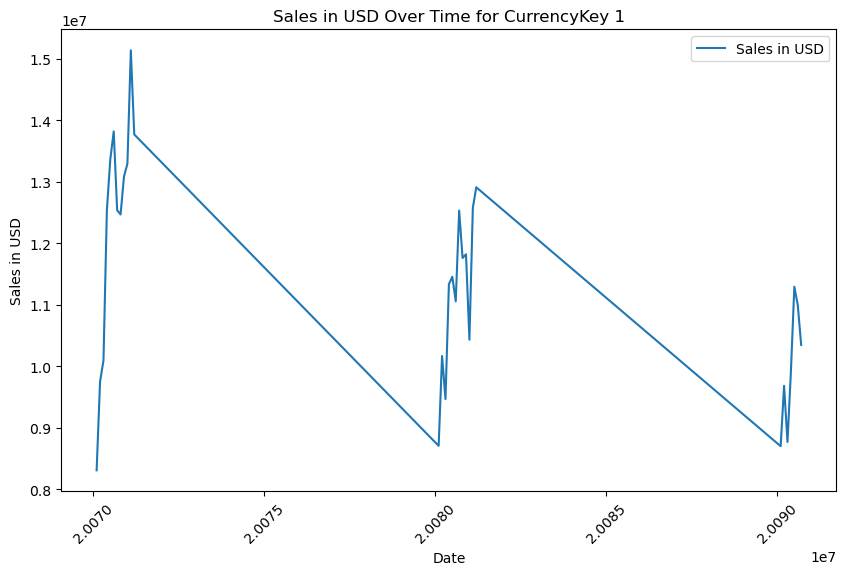

In [18]:
import matplotlib.pyplot as plt

currency = 1
currency_sales = sales_analysis[sales_analysis['CurrencyKey'] == currency]

plt.figure(figsize=(10, 6))
plt.plot(currency_sales['DateKey'], currency_sales['USDSales'], label='Sales in USD')
plt.title(f'Sales in USD Over Time for CurrencyKey {currency}')
plt.xlabel('Date')
plt.ylabel('Sales in USD')
plt.xticks(rotation=45)
plt.legend()
plt.show()